In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
import networkit as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import random

from sklearn.preprocessing import StandardScaler
from IPython.display import display, Math, Latex, Markdown
from tqdm.notebook import tqdm

from External.ICT.calculate_ICT import calculate_ICT
from External.clustering import centers
from External.generation import create_graph
from External.plotting import plot_points, plot_graph, no_intersections

plt.style.use('standard.mplstyle')

cv2 package not present. No movies possible


In [5]:
# Hyperparameters
mode = "K_Nearest"
metric = "euclidean"
dataset = "non_convex"
ICT_algorithm = "cluster_all"

# image loading
n = number_of_nodes = 1000
Random = True
image_name = "image"

# for the filename
parameters = "2-0_5-1000"

In [6]:
def load_image(filename):
    a=plt.imread(filename+'.png')
    rgb_weights = [0.2989, 0.5870, 0.1140]
    
    grayscale_image = np.dot(a[...,:3], rgb_weights)>0
    
    return grayscale_image
    
    
def sample_points_from_image(n,img,Random=True):
    if not Random:
        random.seed(42)
    non_zero = np.where(img!=0)
    # non_zero=np.vstack((non_zero[0],non_zero[1])).T
    
    
    idx = random.sample(range(len(non_zero[0])),n)
    
    x_coord = non_zero[0][idx]
    y_coord = non_zero[1][idx]
    return x_coord,y_coord

sklearn is done: 0.8565795421600342
My own part is done: 0.003922700881958008
Final k: 11


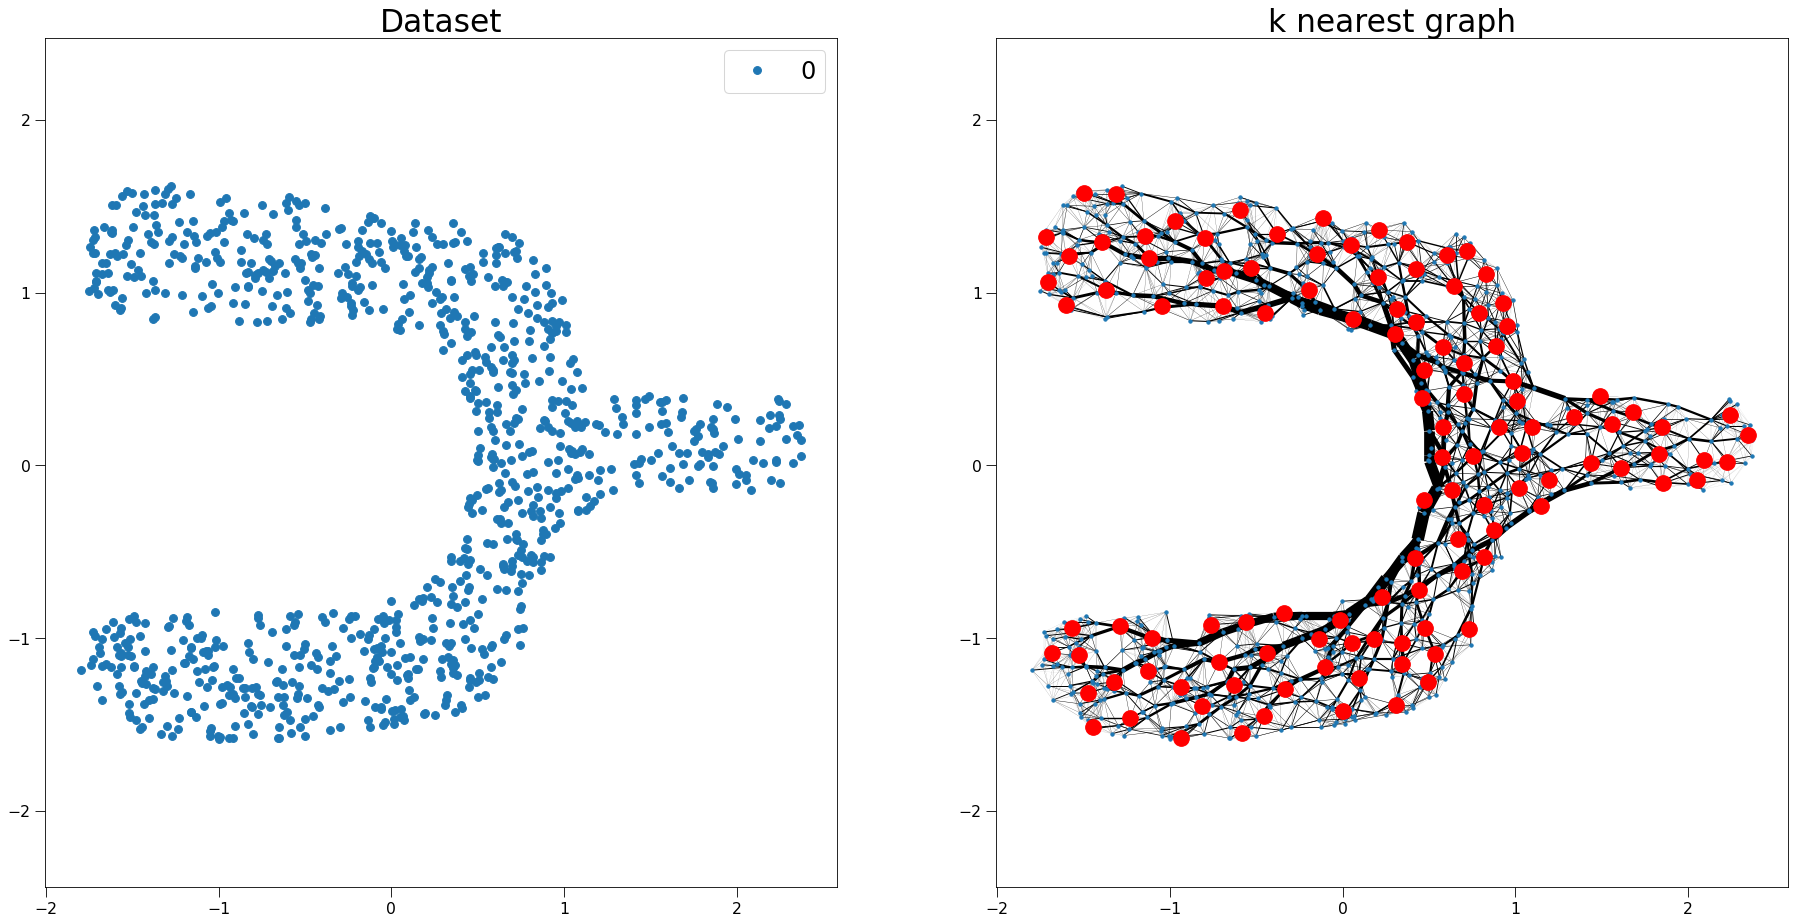

In [7]:
# Compute the position array
img = load_image(image_name)
position = np.array(sample_points_from_image(n,img,Random)).T
position = StandardScaler().fit_transform(position)

# Compute knearest graph
cluster_centers = centers(position)
G, _ = create_graph(number_of_nodes, mode, position=position, beta=2, delta=0.5)
G.indexEdges()

# Plot the prepared data
fig, axs = plt.subplots(1, 2)
plot_points(position, "Dataset", axs[0])
plot_graph(G, position, "k nearest graph", axs[1], cluster_centers)
plt.show()

In [8]:
ICT = calculate_ICT(G, algorithm_type=ICT_algorithm, cluster_centers=cluster_centers,
                                zeros_stay_zeros=True, update_G=1.1)
ICT.indexEdges()

None
[]


create edgeId array:   0%|          | 0/6403 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/6403 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/999 [00:00<?, ?it/s]

update Arr 6403 -> 5379
update Arr 5379 -> 4880
update Arr 4880 -> 4430
added 2 edges early
update Arr 4430 -> 4025
added 6 edges early
update Arr 4025 -> 3656
added 5 edges early
update Arr 3656 -> 3310
added 2 edges early
update Arr 3310 -> 3007
added 4 edges early
update Arr 3007 -> 2708
added 18 edges early
update Arr 2708 -> 2452
added 31 edges early
update Arr 2452 -> 2218
added 56 edges early
update Arr 2218 -> 2009
added 50 edges early
update Arr 2009 -> 1811
added 45 edges early
update Arr 1811 -> 1646
added 55 edges early
update Arr 1646 -> 1491
added 85 edges early
update Arr 1491 -> 1349
added 92 edges early
update Arr 1349 -> 1223
added 108 edges early
update Arr 1223 -> 1103
added 89 edges early
update Arr 1103 -> 1001
added 90 edges early
update Arr 1001 -> 1001
update Arr 1001 -> 1001
update Arr 1001 -> 1001
update Arr 1001 -> 1001
update Arr 1001 -> 1001
update Arr 1001 -> 1001
update Arr 1001 -> 1001
update Arr 1001 -> 1001
update Arr 1001 -> 1001
update Arr 1001 -> 1

In [9]:
max_st = nk.graph.RandomMaximumSpanningForest(G)
max_st.run()
max_st = max_st.getMSF(True)
max_st.indexEdges()

In [10]:
G_inv = nk.graph.Graph(n=G.numberOfNodes(), weighted=True)
for u,v,w in G.iterEdgesWeights():
    G_inv.addEdge(u,v,1/w)

min_st = nk.graph.RandomMaximumSpanningForest(G_inv)
min_st.run()
min_st = min_st.getMSF(True)
min_st.indexEdges()

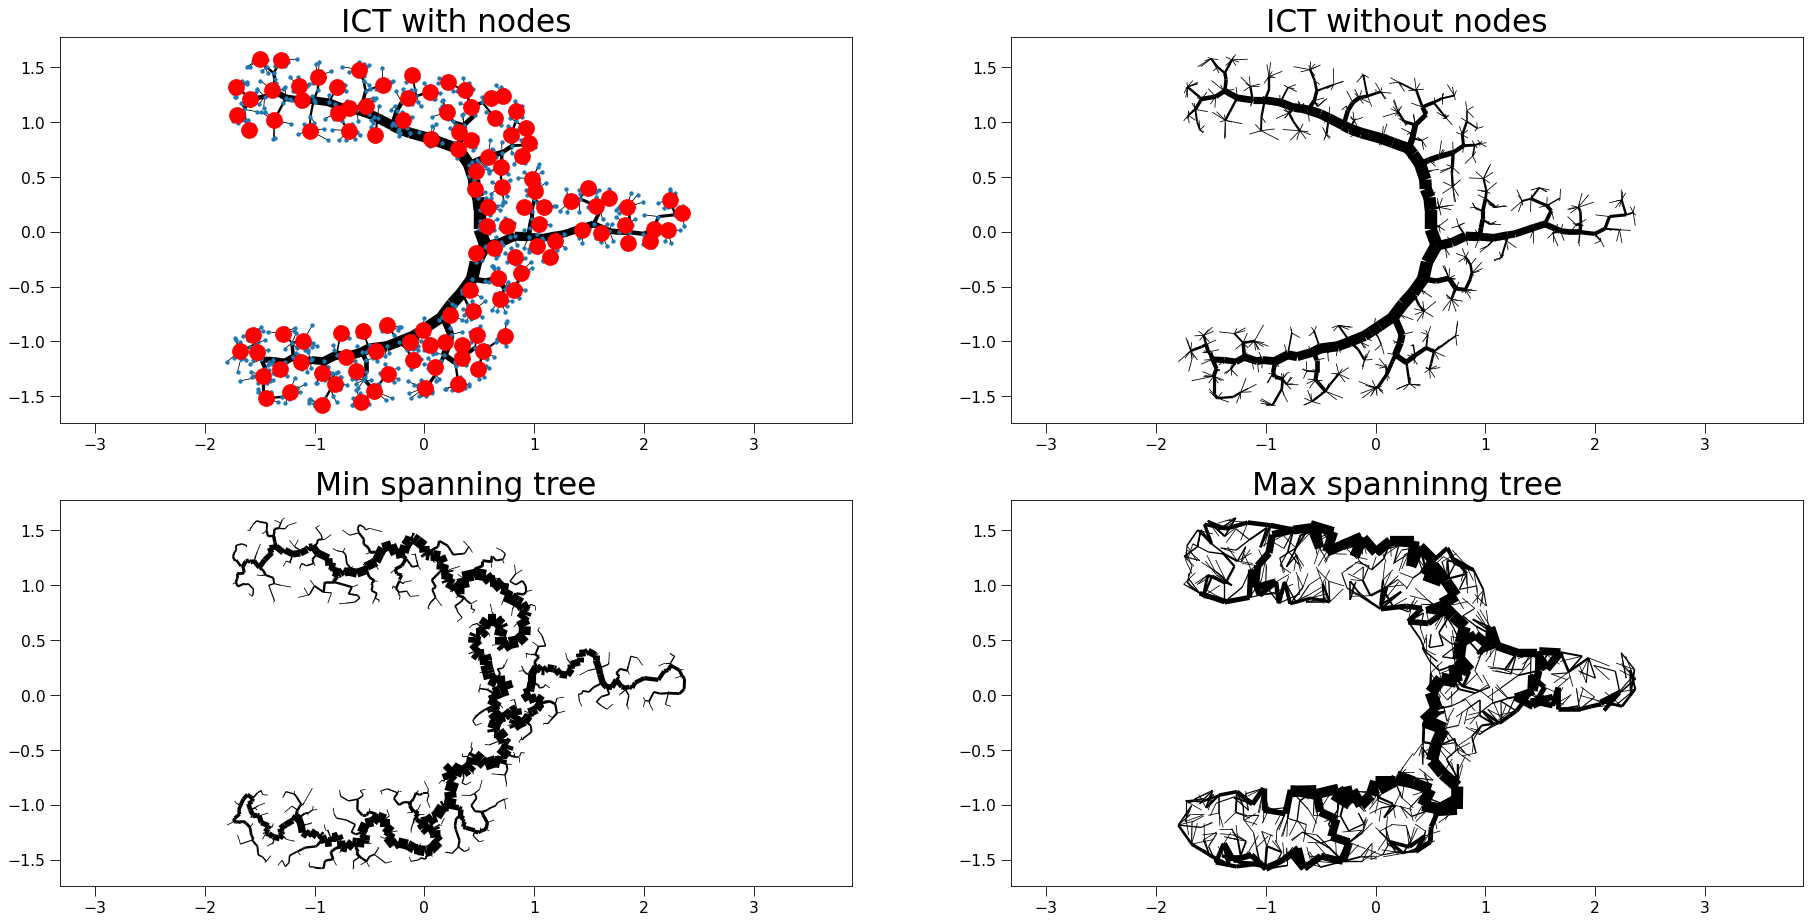

In [11]:
# Plot the ICT
fig, axs = plt.subplots(2, 2)
plot_graph(ICT, position, "ICT with nodes", axs[0,0], cluster_centers)
plot_graph(ICT, position, "ICT without nodes", axs[0,1], node_size=0)
plot_graph(max_st, position, "Max spanninng tree", axs[1,1], node_size=0)
plot_graph(min_st, position, "Min spanning tree", axs[1,0], node_size=0)
# plt.savefig(dataset+"-"+parameters+".png")

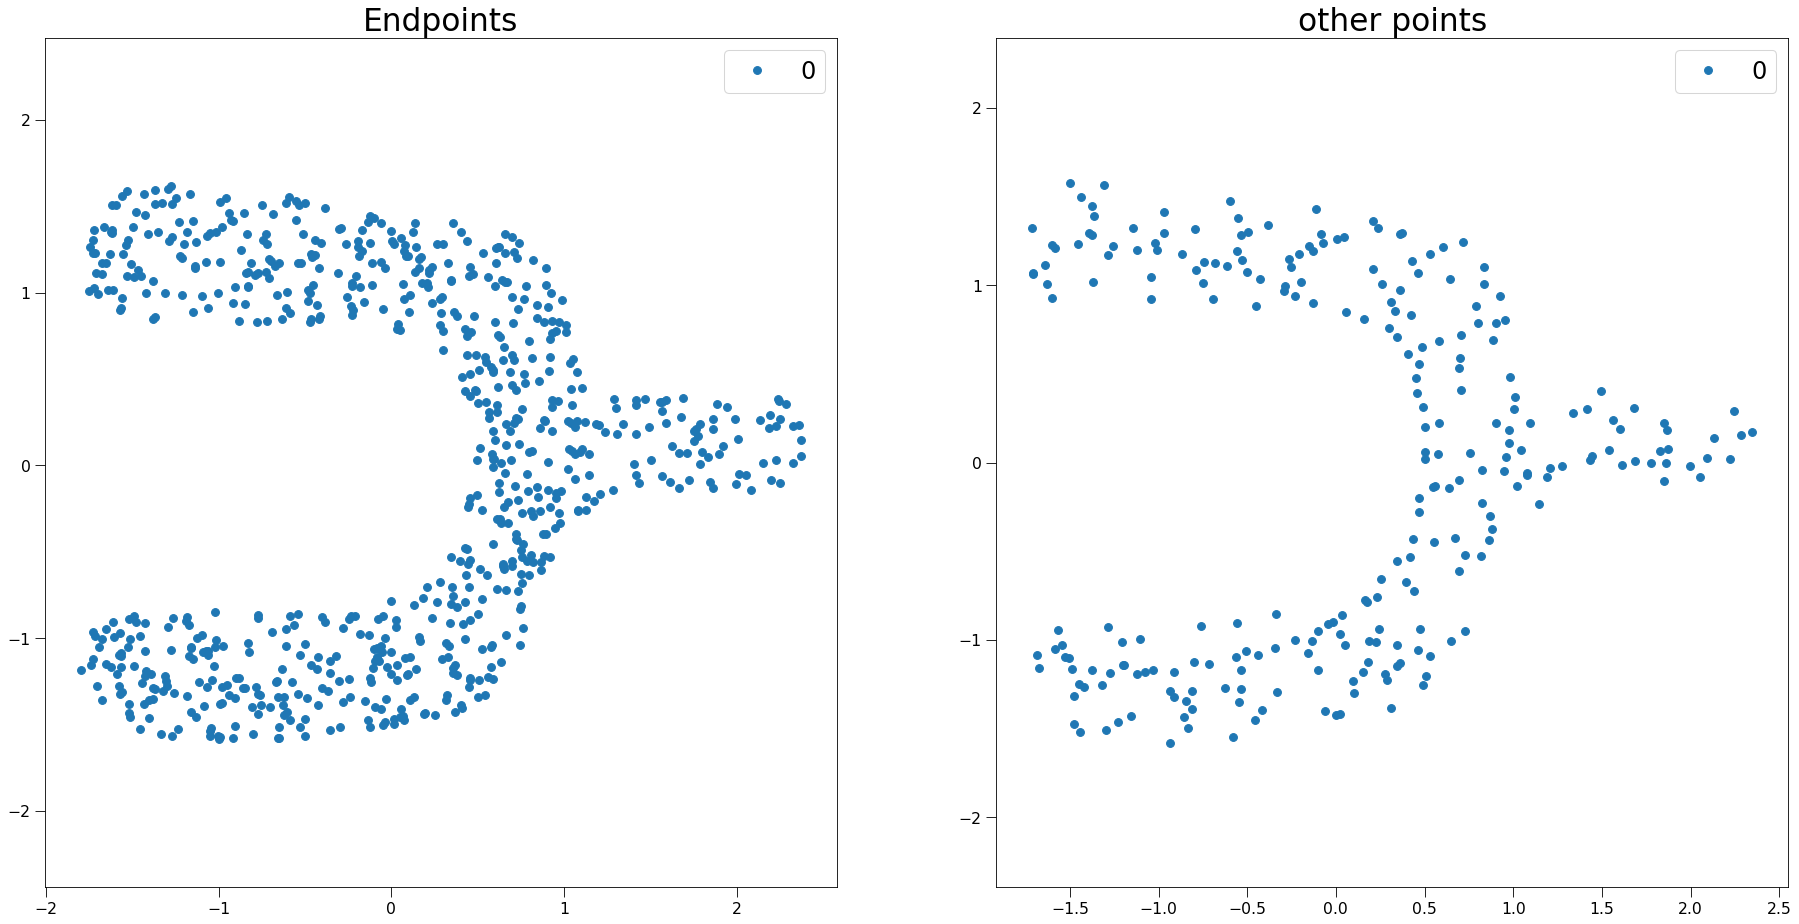

In [12]:
fig, axs = plt.subplots(1,2)
good = []

for u in ICT.iterNodes():
    if ICT.degree(u)==1:
        good.append(u)
        
plot_points(position[good], "Endpoints", axs[0])
plot_points(np.delete(position, good, axis=0), "other points", axs[1])
        

sklearn is done: 0.5617215633392334
My own part is done: 0.0036249160766601562
Final k: 11


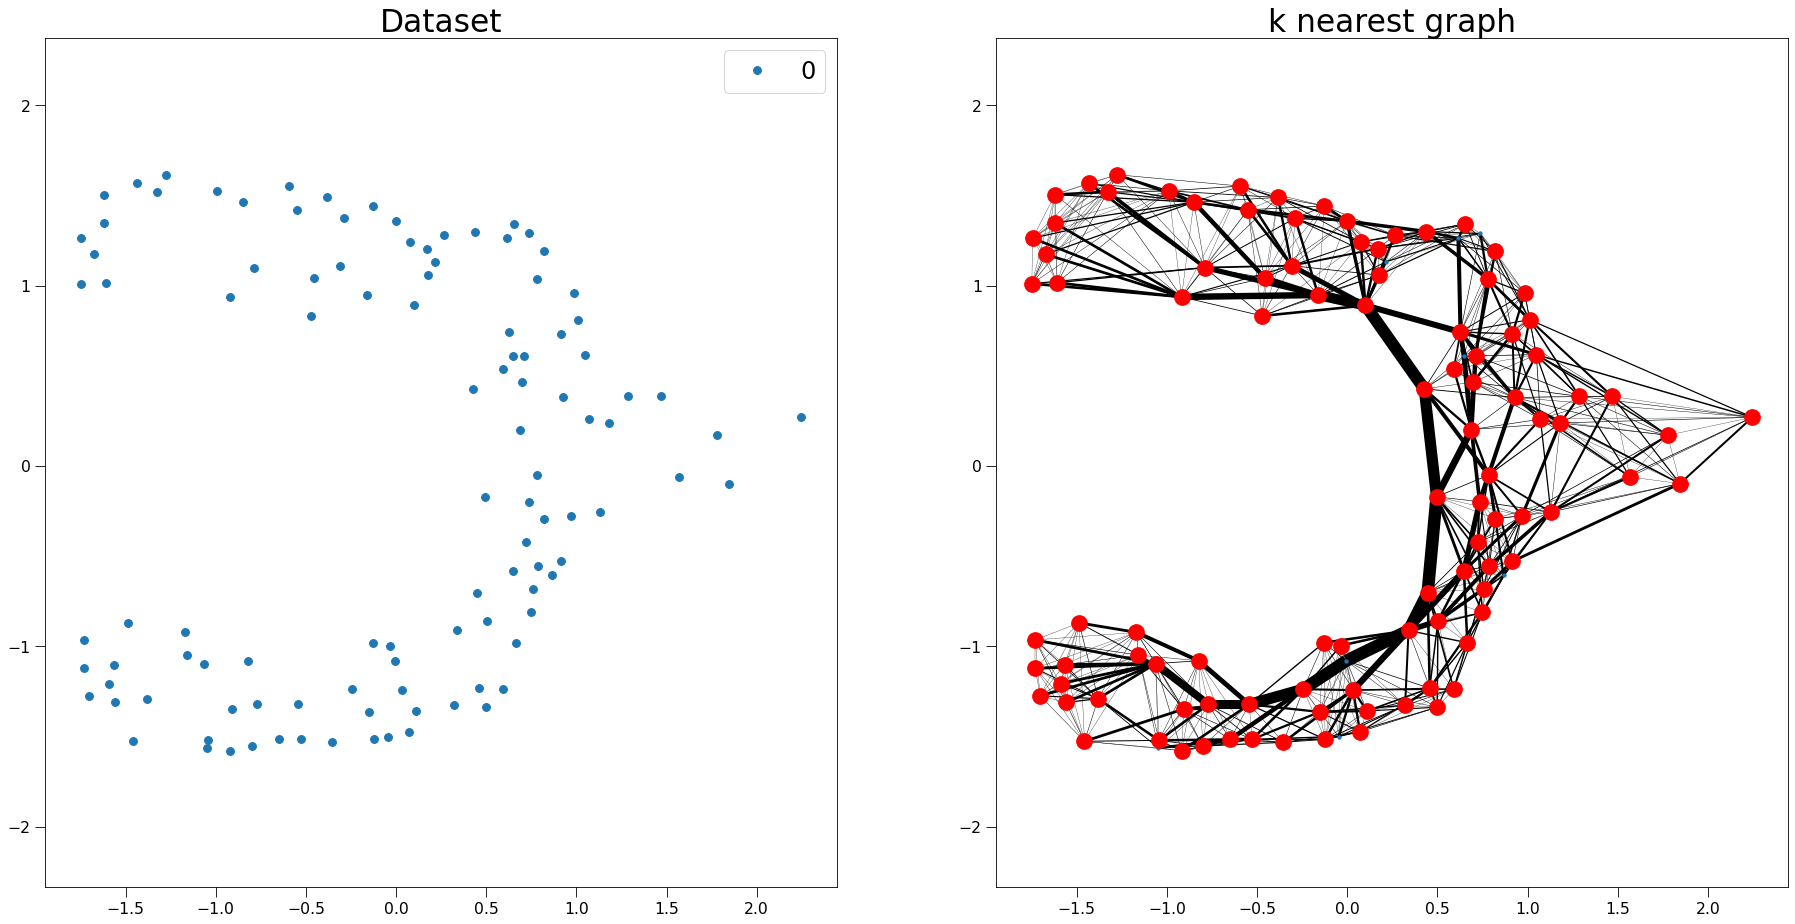

None
[]


create edgeId array:   0%|          | 0/685 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/685 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/108 [00:00<?, ?it/s]

update Arr 685 -> 622
update Arr 622 -> 565
update Arr 565 -> 508
update Arr 508 -> 454
update Arr 454 -> 409
update Arr 409 -> 370
update Arr 370 -> 332
update Arr 332 -> 299
update Arr 299 -> 266
update Arr 266 -> 241
update Arr 241 -> 211
added 2 edges early
update Arr 211 -> 191
update Arr 191 -> 165
update Arr 165 -> 147
update Arr 147 -> 129
update Arr 129 -> 118
update Arr 118 -> 114
update Arr 114 -> 111
update Arr 111 -> 109
update Arr 109 -> 108


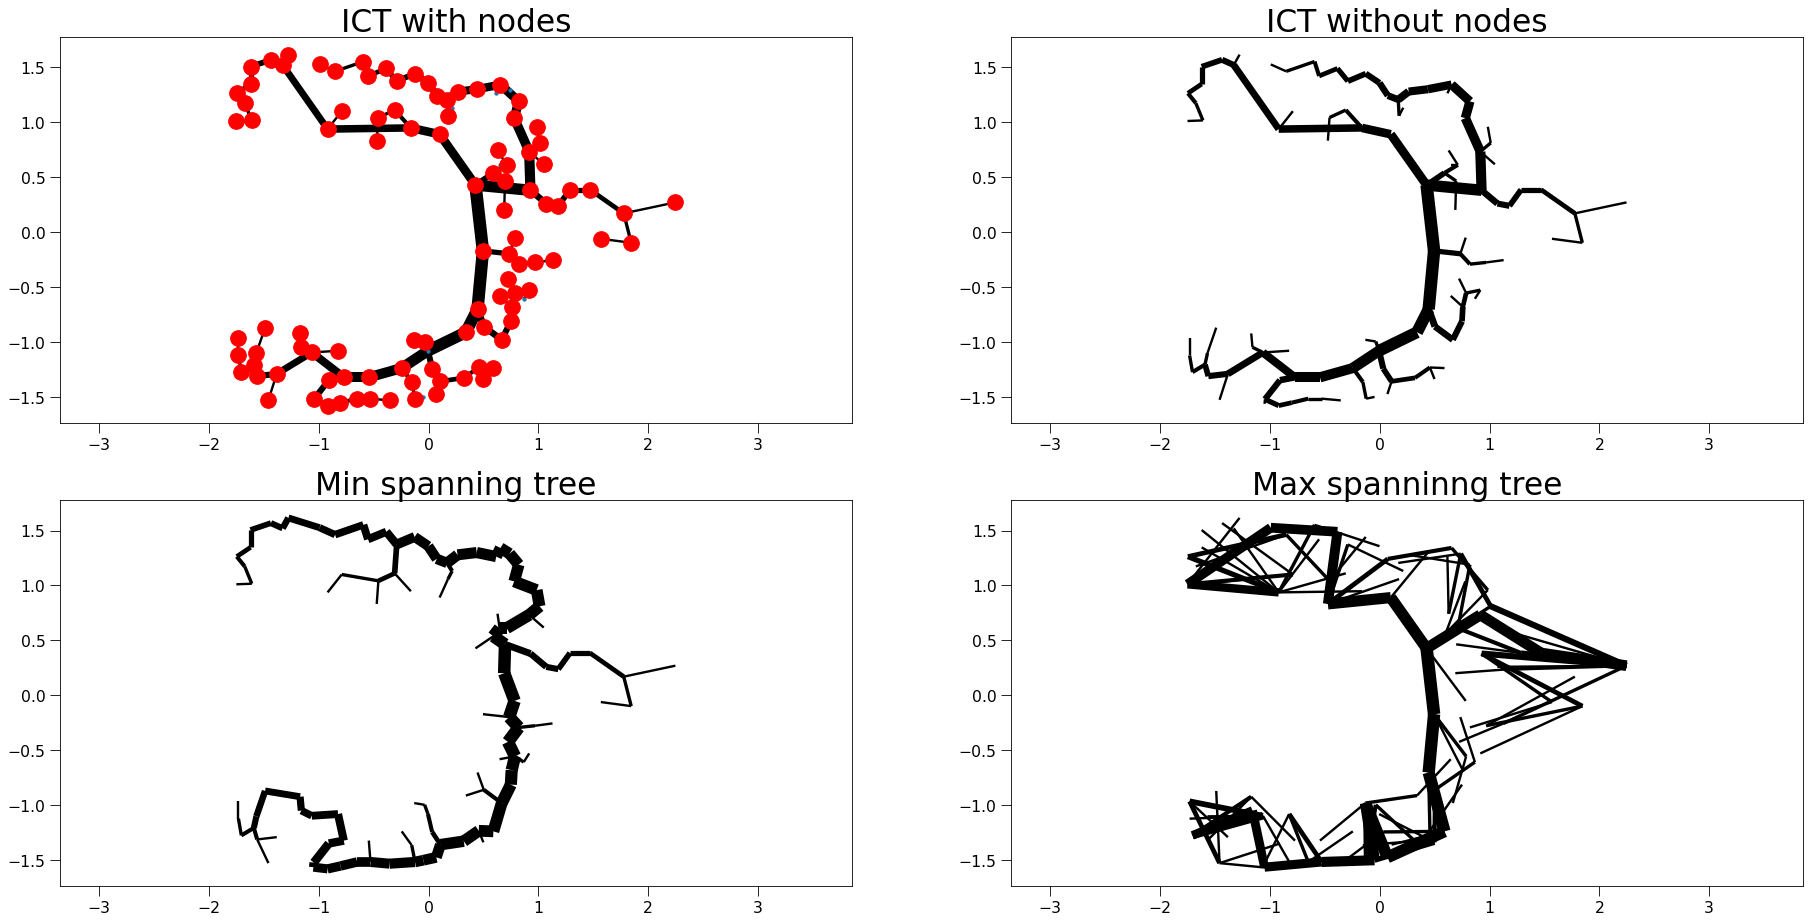

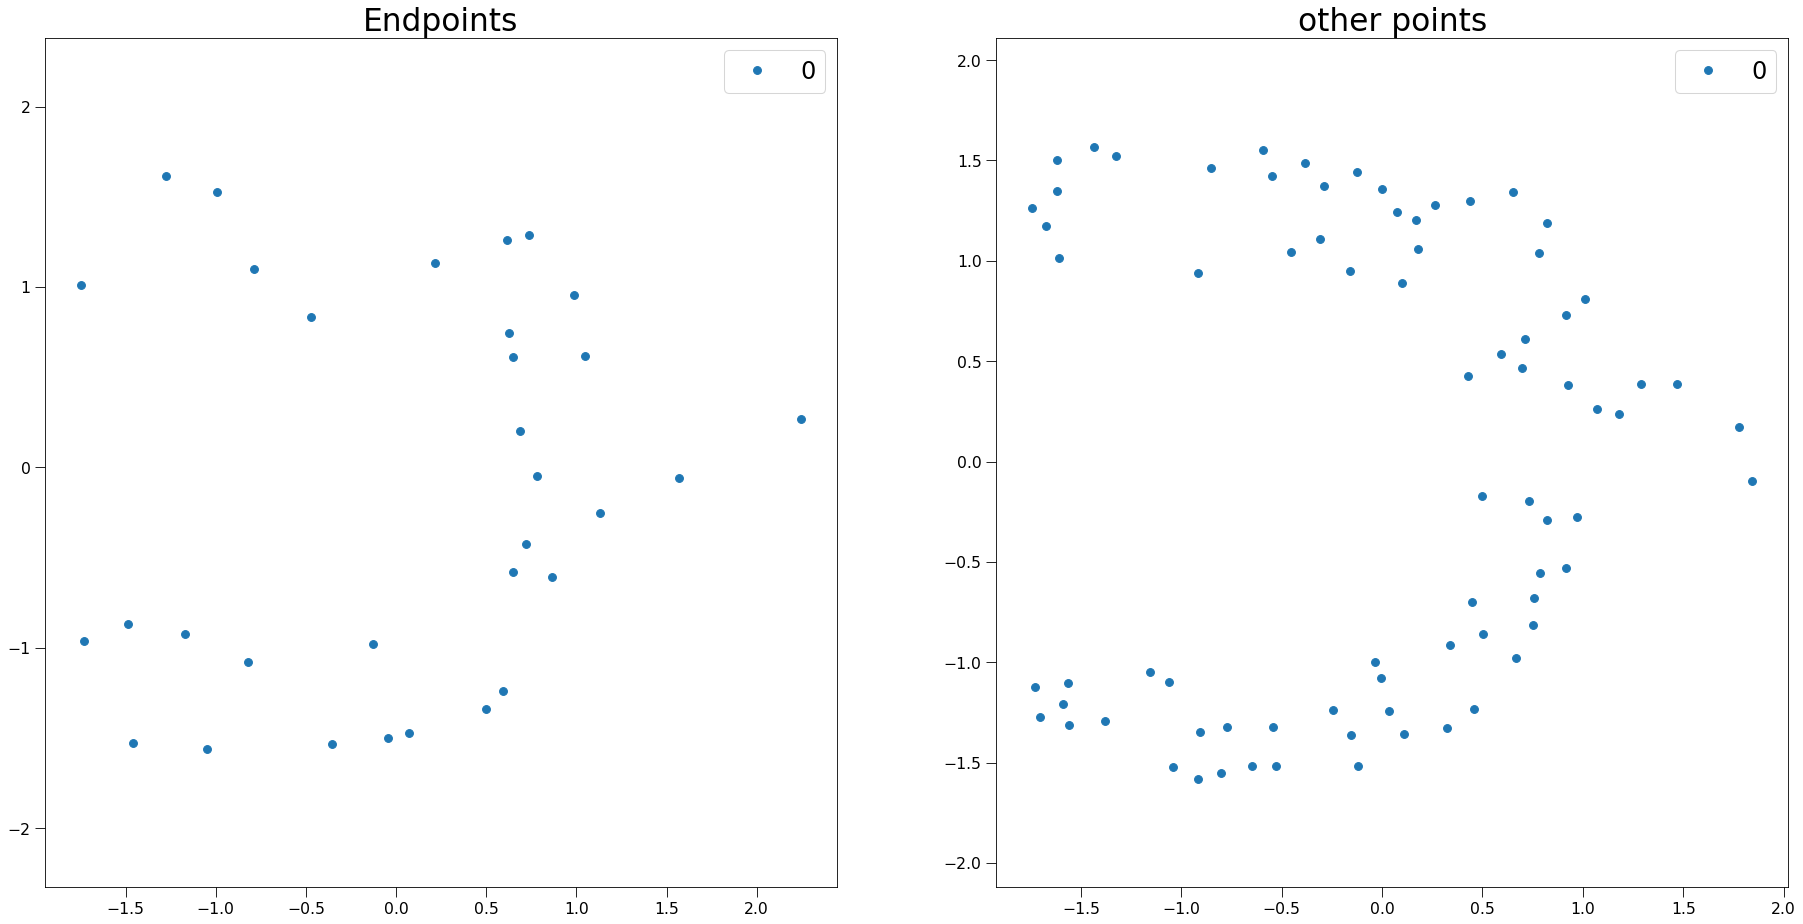

In [17]:
# position = np.delete(position, good, axis=0)
position = position[good]
number_of_nodes = len(position)
# Compute knearest graph
cluster_centers = centers(position)
G, _ = create_graph(number_of_nodes, mode, position=position, beta=2, delta=0.5)
G.indexEdges()

# Plot the prepared data
fig, axs = plt.subplots(1, 2)
plot_points(position, "Dataset", axs[0])
plot_graph(G, position, "k nearest graph", axs[1], cluster_centers)
plt.show()
ICT = calculate_ICT(G, algorithm_type=ICT_algorithm, cluster_centers=cluster_centers,
                                zeros_stay_zeros=True, update_G=1.1)
ICT.indexEdges()
max_st = nk.graph.RandomMaximumSpanningForest(G)
max_st.run()
max_st = max_st.getMSF(True)
max_st.indexEdges()
G_inv = nk.graph.Graph(n=G.numberOfNodes(), weighted=True)
for u,v,w in G.iterEdgesWeights():
    G_inv.addEdge(u,v,1/w)

min_st = nk.graph.RandomMaximumSpanningForest(G_inv)
min_st.run()
min_st = min_st.getMSF(True)
min_st.indexEdges()
# Plot the ICT
fig, axs = plt.subplots(2, 2)
plot_graph(ICT, position, "ICT with nodes", axs[0,0], cluster_centers)
plot_graph(ICT, position, "ICT without nodes", axs[0,1], node_size=0)
plot_graph(max_st, position, "Max spanninng tree", axs[1,1], node_size=0)
plot_graph(min_st, position, "Min spanning tree", axs[1,0], node_size=0)
# plt.savefig(dataset+"-"+parameters+".png")
plt.show()



fig, axs = plt.subplots(1,2)
good = []

for u in ICT.iterNodes():
    if ICT.degree(u)==1:
        good.append(u)
        
plot_points(position[good], "Endpoints", axs[0])
plot_points(np.delete(position, good, axis=0), "other points", axs[1])
plt.show()
        